# Telecom Customer Churn Prediction - Exploratory Data Analysis

## Project Overview
This notebook performs comprehensive exploratory data analysis on the telecom churn dataset to understand patterns, relationships, and prepare for model building.

**Objective**: Predict customer churn using logistic regression

**Dataset**: Telecom customer data with various features related to usage and billing

## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Inspect Data

In [2]:
# Load the dataset
df = pd.read_csv('../telecom_churn.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows:")
df.head()

Dataset Shape: (3333, 11)

First 5 rows:


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Display data types and non-null counts
print("Dataset Information:")
print("="*80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
# Statistical summary
print("Statistical Summary:")
print("="*80)
df.describe()

Statistical Summary:


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## 3. Data Quality Assessment

In [5]:
# Check for missing values
print("Missing Values:")
print("="*80)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0]

if len(missing_data) > 0:
    print(missing_data)
else:
    print("✓ No missing values found in the dataset!")

Missing Values:
✓ No missing values found in the dataset!


In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
else:
    print("✓ No duplicate rows found!")

Duplicate Rows: 0
✓ No duplicate rows found!


## 4. Target Variable Analysis

Churn Distribution:
Not Churned (0): 2850 (85.51%)
Churned (1): 483 (14.49%)


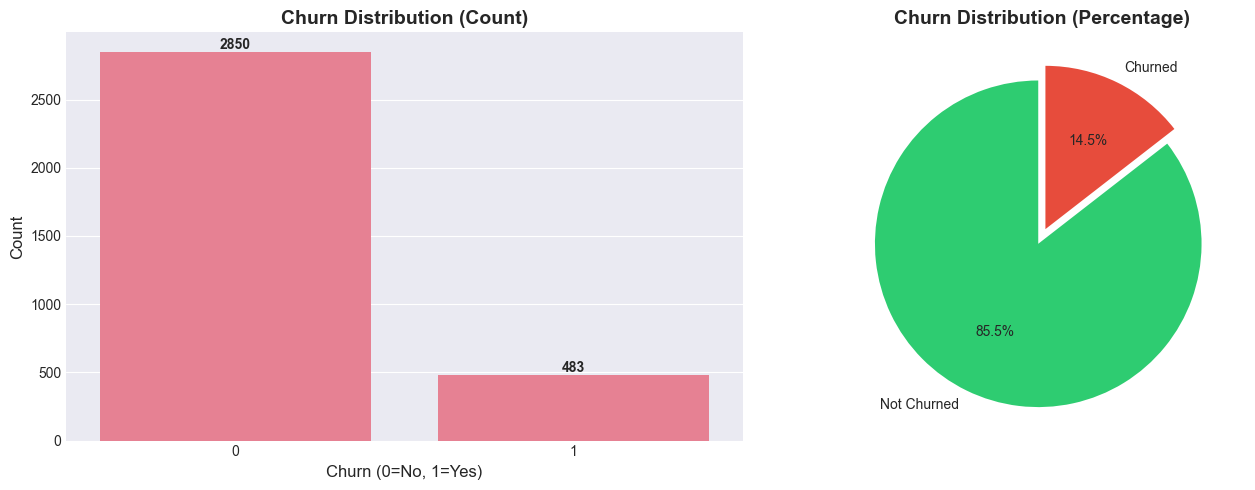

In [11]:
# Analyze target variable distribution
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print("="*80)
print(f"Not Churned (0): {churn_counts[0]} ({churn_percentages[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]} ({churn_percentages[1]:.2f}%)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for i, v in enumerate(churn_counts):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%',
            startangle=90, colors=colors, explode=(0.05, 0.05))
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Feature Analysis

In [24]:
# Separate features by type
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Churn')  # Remove target variable

print(f"Numerical Features ({len(numerical_features)}):")
print(numerical_features)

Numerical Features (10):
['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']


### 5.1 Distribution of Numerical Features

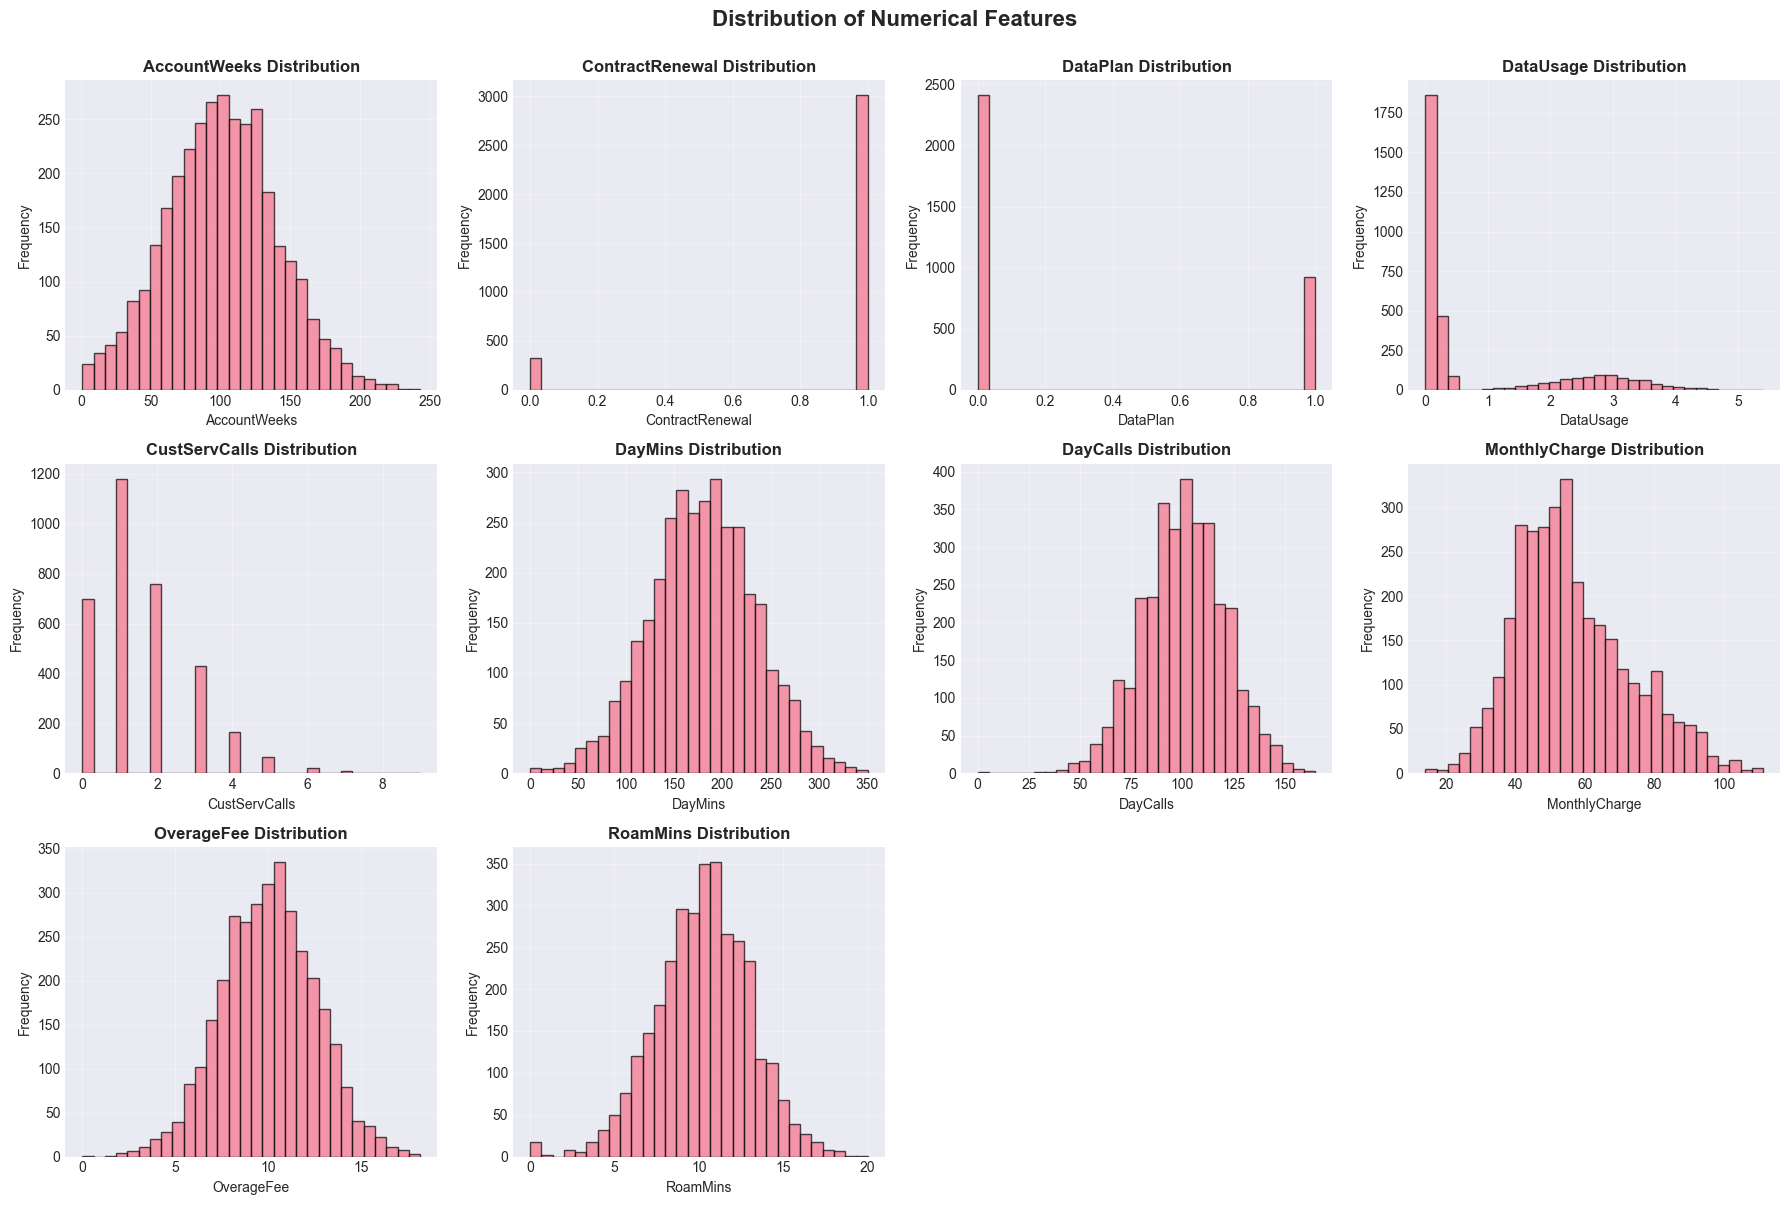

In [25]:
# Visualize distributions of all numerical features
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 5.2 Features vs Churn Analysis

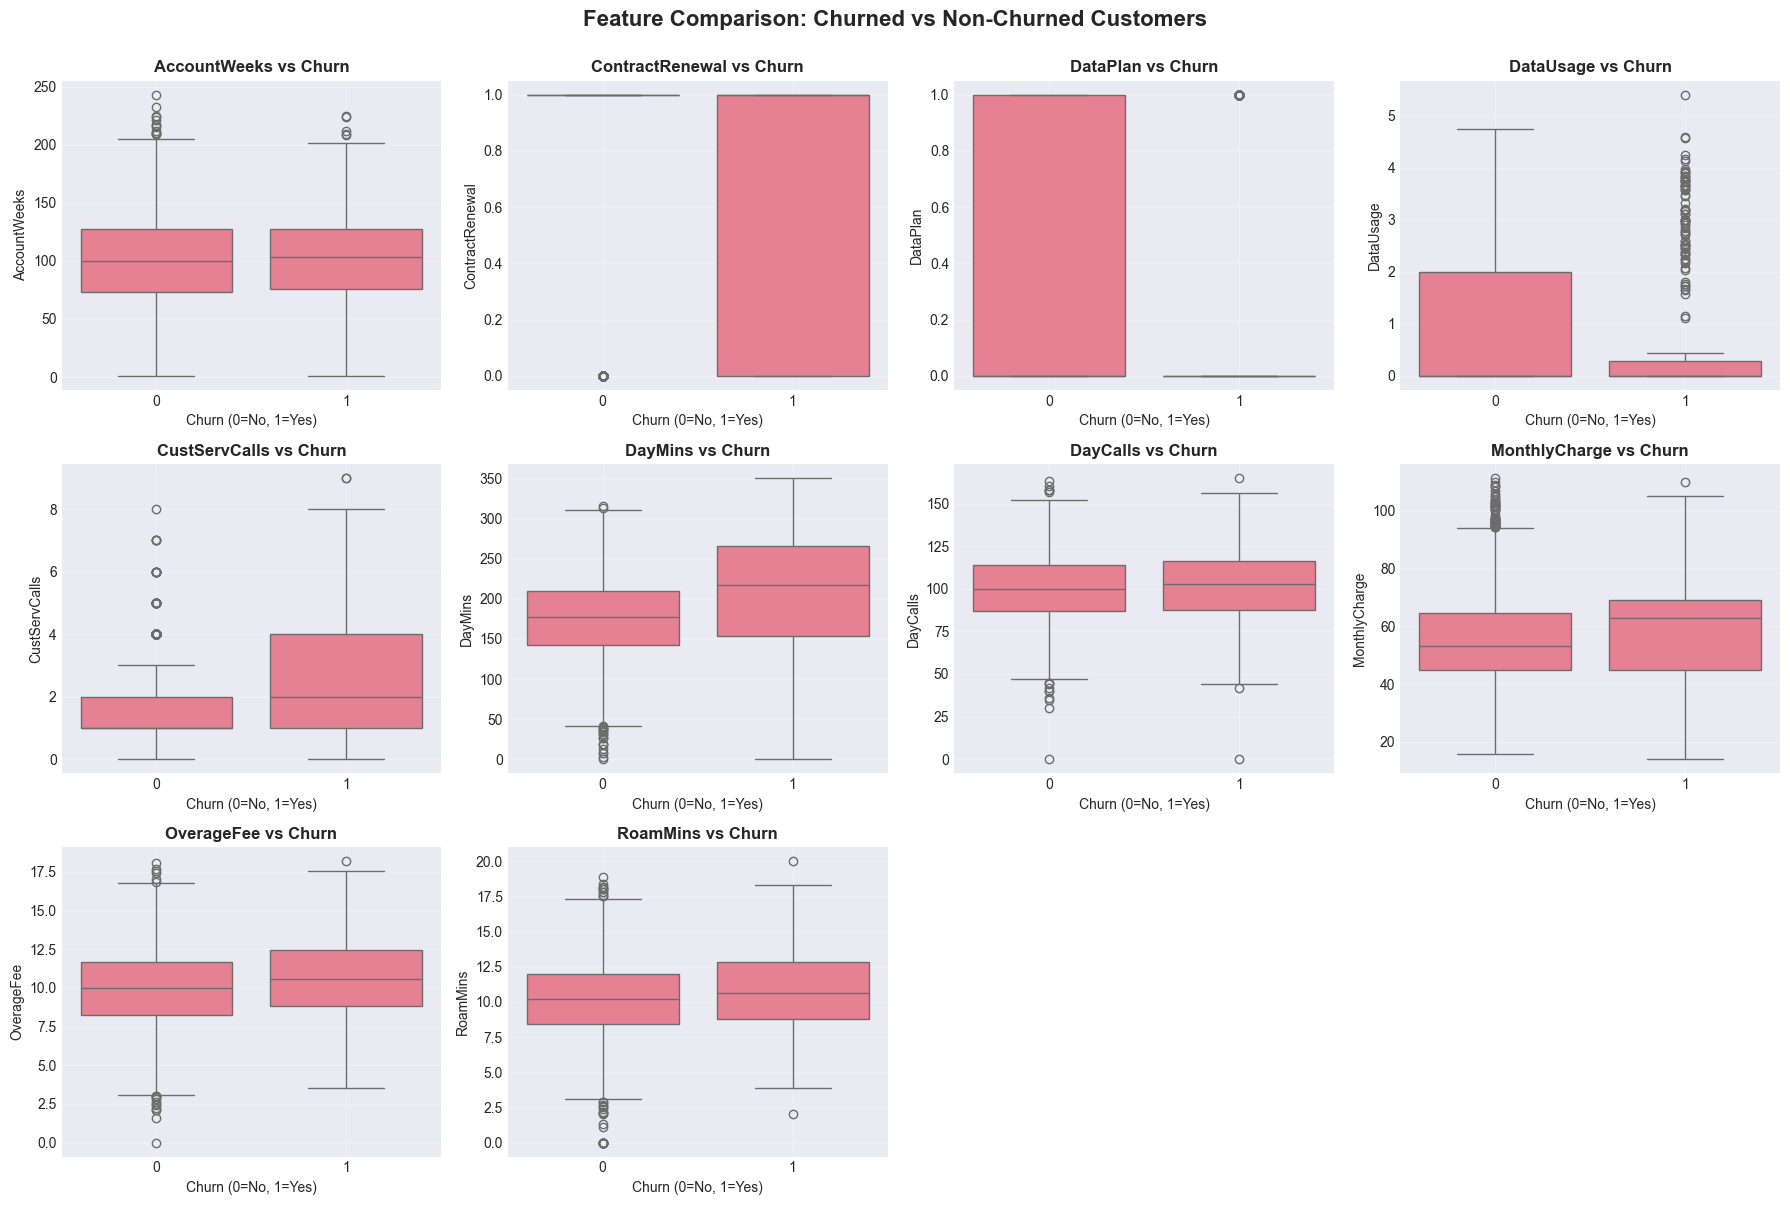

In [27]:
# Analyze how each feature varies with churn
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Churn', fontweight='bold')
    axes[idx].set_xlabel('Churn (0=No, 1=Yes)')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])  

plt.suptitle('Feature Comparison: Churned vs Non-Churned Customers', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [28]:
# Statistical comparison of features between churned and non-churned customers
print("Feature Statistics by Churn Status:")
print("="*100)

comparison_df = df.groupby('Churn')[numerical_features].mean()
comparison_df = comparison_df.T
comparison_df.columns = ['Not Churned (0)', 'Churned (1)']
comparison_df['Difference'] = comparison_df['Churned (1)'] - comparison_df['Not Churned (0)']
comparison_df['Difference %'] = (comparison_df['Difference'] / comparison_df['Not Churned (0)']) * 100

# Sort by absolute difference percentage
comparison_df = comparison_df.reindex(
    comparison_df['Difference %'].abs().sort_values(ascending=False).index
)

print(comparison_df.round(2))

Feature Statistics by Churn Status:
                 Not Churned (0)  Churned (1)  Difference  Difference %
CustServCalls               1.45         2.23        0.78         53.80
DataPlan                    0.30         0.17       -0.13        -43.94
DataUsage                   0.86         0.55       -0.32        -36.56
ContractRenewal             0.93         0.72       -0.22        -23.36
DayMins                   175.18       206.91       31.74         18.12
OverageFee                  9.95        10.62        0.67          6.72
MonthlyCharge              55.82        59.19        3.37          6.04
RoamMins                   10.16        10.70        0.54          5.33
AccountWeeks              100.79       102.66        1.87          1.86
DayCalls                  100.28       101.34        1.05          1.05


## 6. Correlation Analysis

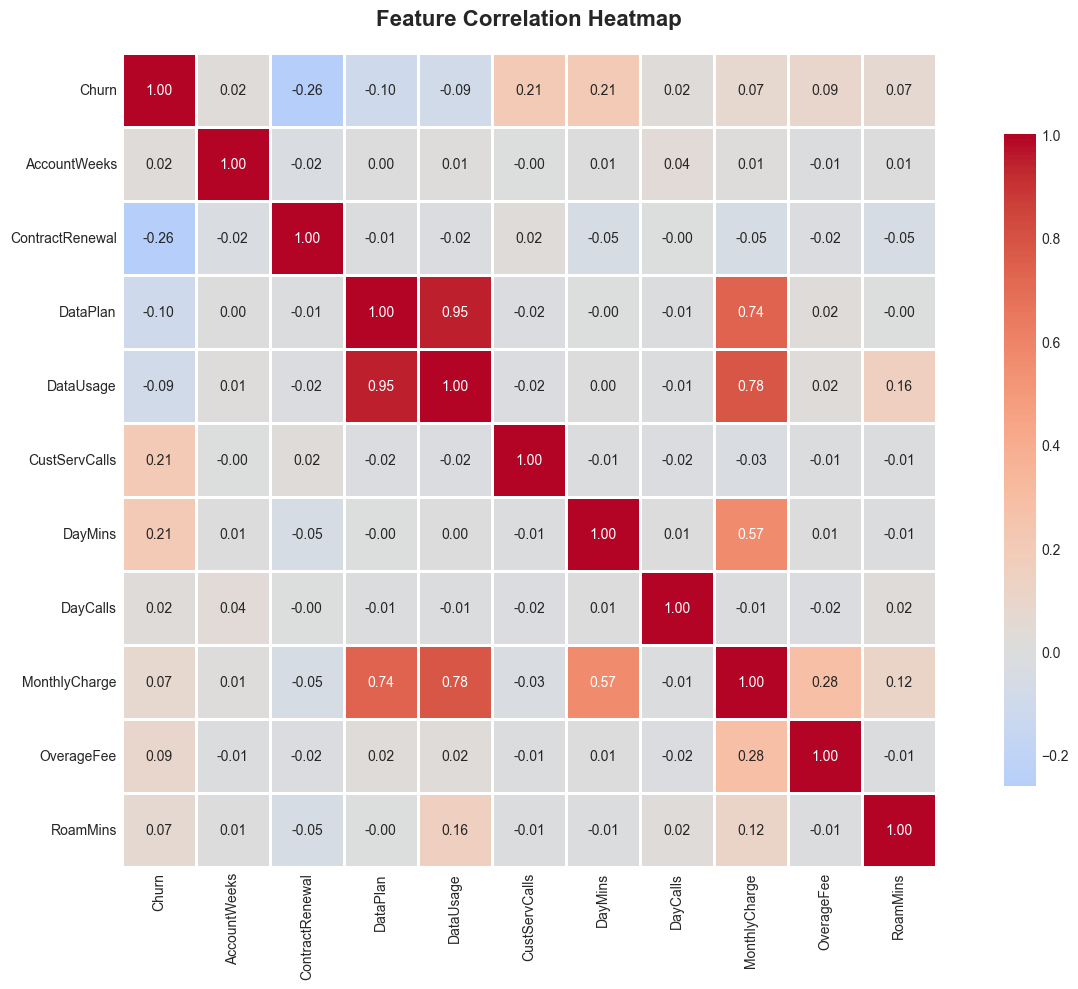

In [38]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [39]:
# Find features most correlated with Churn
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print("Features Correlation with Churn:")
print("="*80)
print(churn_correlation)

Features Correlation with Churn:
Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


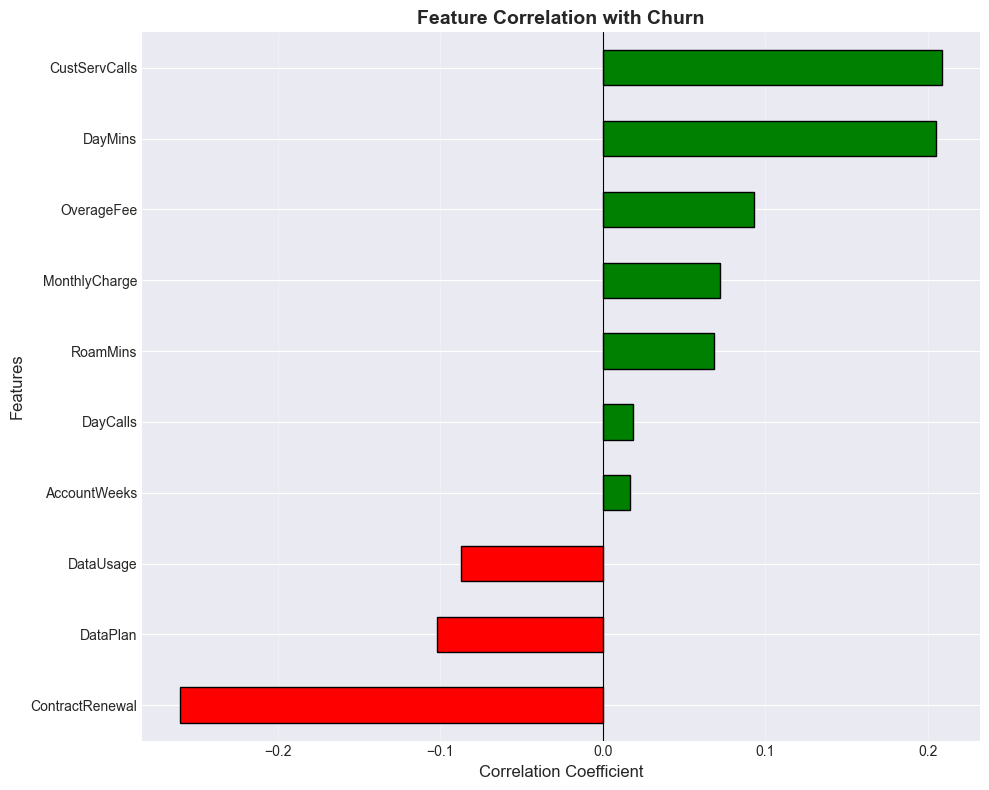

In [46]:
# Visualize correlation with target variable
plt.figure(figsize=(10, 8))
churn_corr_sorted = churn_correlation.drop('Churn').sort_values()
colors = ['red' if x < 0 else 'green' for x in churn_corr_sorted]
churn_corr_sorted.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Feature Correlation with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Outlier Detection

In [47]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, features):
    outlier_summary = {}
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_summary[feature] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_summary

outlier_info = detect_outliers_iqr(df, numerical_features)

print("Outlier Analysis (IQR Method):")
print("="*100)
for feature, info in outlier_info.items():
    print(f"{feature}:")
    print(f"  Count: {info['count']} ({info['percentage']:.2f}%)")
    print(f"  Valid Range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print()

Outlier Analysis (IQR Method):
AccountWeeks:
  Count: 18 (0.54%)
  Valid Range: [-5.50, 206.50]

ContractRenewal:
  Count: 323 (9.69%)
  Valid Range: [1.00, 1.00]

DataPlan:
  Count: 0 (0.00%)
  Valid Range: [-1.50, 2.50]

DataUsage:
  Count: 11 (0.33%)
  Valid Range: [-2.67, 4.45]

CustServCalls:
  Count: 267 (8.01%)
  Valid Range: [-0.50, 3.50]

DayMins:
  Count: 25 (0.75%)
  Valid Range: [34.65, 325.45]

DayCalls:
  Count: 23 (0.69%)
  Valid Range: [46.50, 154.50]

MonthlyCharge:
  Count: 34 (1.02%)
  Valid Range: [13.20, 98.00]

OverageFee:
  Count: 24 (0.72%)
  Valid Range: [3.17, 16.93]

RoamMins:
  Count: 46 (1.38%)
  Valid Range: [3.10, 17.50]



## 8. Feature Engineering Insights

In [48]:
# Create some derived features for analysis
df_analysis = df.copy()

# Average minute per call
df_analysis['AvgMinsPerCall'] = df_analysis['DayMins'] / (df_analysis['DayCalls'] + 1)  # +1 to avoid division by zero

# Total revenue indicator
df_analysis['TotalRevenue'] = df_analysis['MonthlyCharge'] + df_analysis['OverageFee']

# Customer service engagement
df_analysis['HighCustServCalls'] = (df_analysis['CustServCalls'] >= 4).astype(int)

print("Sample of engineered features:")
df_analysis[['AvgMinsPerCall', 'TotalRevenue', 'HighCustServCalls', 'Churn']].head(10)

Sample of engineered features:


,AvgMinsPerCall,TotalRevenue,HighCustServCalls,Churn
0,2.388288,98.87,0,0
1,1.303226,91.78,0,0
2,2.116522,58.06,0,0
3,4.158333,60.10,0,0
4,1.462281,48.42,0,0
5,2.256566,68.03,0,0
6,2.451685,104.73,0,0
7,1.962500,41.16,0,0
8,1.882653,81.48,0,0
9,3.042353,104.30,0,0


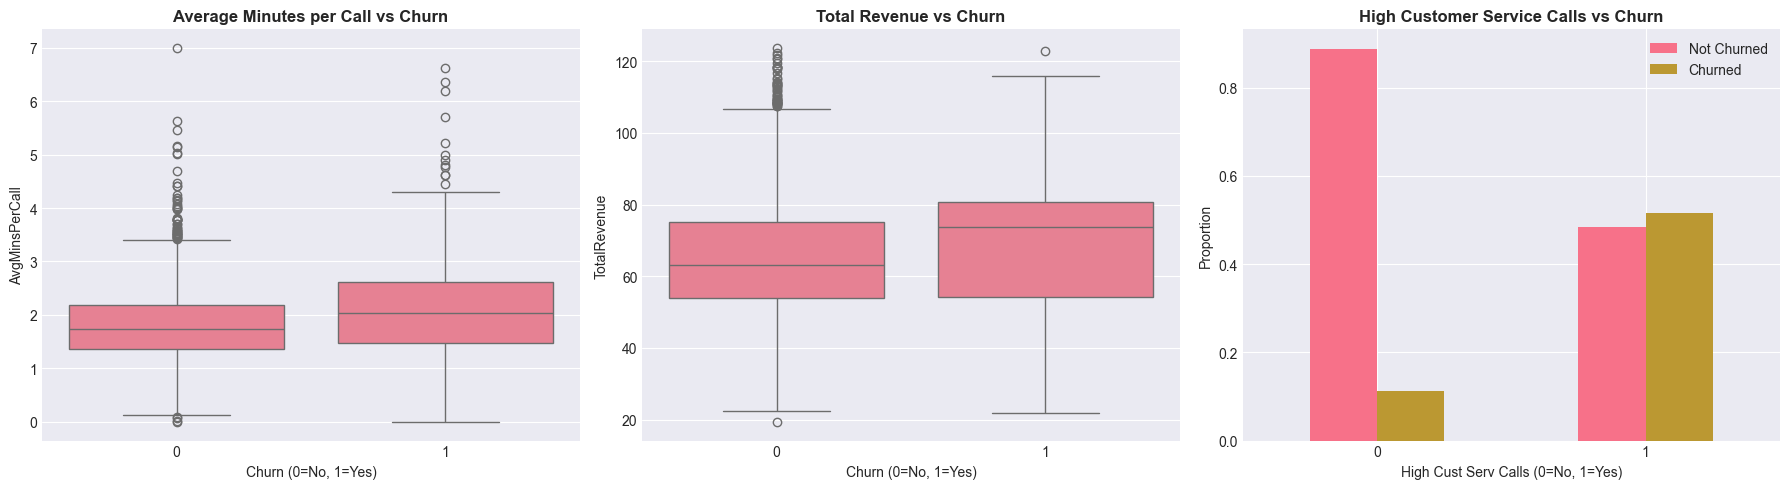

In [49]:
# Analyze engineered features with churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# AvgMinsPerCall vs Churn
sns.boxplot(data=df_analysis, x='Churn', y='AvgMinsPerCall', ax=axes[0])
axes[0].set_title('Average Minutes per Call vs Churn', fontweight='bold')
axes[0].set_xlabel('Churn (0=No, 1=Yes)')

# TotalRevenue vs Churn
sns.boxplot(data=df_analysis, x='Churn', y='TotalRevenue', ax=axes[1])
axes[1].set_title('Total Revenue vs Churn', fontweight='bold')
axes[1].set_xlabel('Churn (0=No, 1=Yes)')

# HighCustServCalls vs Churn
pd.crosstab(df_analysis['HighCustServCalls'], df_analysis['Churn'], normalize='index').plot(
    kind='bar', ax=axes[2], rot=0)
axes[2].set_title('High Customer Service Calls vs Churn', fontweight='bold')
axes[2].set_xlabel('High Cust Serv Calls (0=No, 1=Yes)')
axes[2].set_ylabel('Proportion')
axes[2].legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

## 9. Key Insights and Summary

In [50]:
print("="*100)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*100)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total Samples: {len(df):,}")
print(f"   - Total Features: {len(df.columns) - 1}")
print(f"   - Churn Rate: {(df['Churn'].sum() / len(df)) * 100:.2f}%")

print("\n2. DATA QUALITY:")
print(f"   - Missing Values: {'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()}")
print(f"   - Duplicate Rows: {df.duplicated().sum()}")

print("\n3. TOP FEATURES CORRELATED WITH CHURN:")
top_corr = churn_correlation.drop('Churn').abs().sort_values(ascending=False).head(5)
for feature, corr in top_corr.items():
    direction = "positive" if churn_correlation[feature] > 0 else "negative"
    print(f"   - {feature}: {churn_correlation[feature]:.3f} ({direction})")

print("\n4. RECOMMENDATIONS FOR MODEL BUILDING:")
print("   - All features appear relevant; no missing values to handle")
print("   - Class imbalance exists; consider using appropriate evaluation metrics")
print("   - Some features show high correlation with churn (CustServCalls, ContractRenewal)")
print("   - Feature scaling will be important for logistic regression")
print("   - Consider feature engineering based on domain knowledge")

print("\n" + "="*100)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total Samples: 3,333
   - Total Features: 10
   - Churn Rate: 14.49%

2. DATA QUALITY:
   - Missing Values: None
   - Duplicate Rows: 0

3. TOP FEATURES CORRELATED WITH CHURN:
   - ContractRenewal: -0.260 (negative)
   - CustServCalls: 0.209 (positive)
   - DayMins: 0.205 (positive)
   - DataPlan: -0.102 (negative)
   - OverageFee: 0.093 (positive)

4. RECOMMENDATIONS FOR MODEL BUILDING:
   - All features appear relevant; no missing values to handle
   - Class imbalance exists; consider using appropriate evaluation metrics
   - Some features show high correlation with churn (CustServCalls, ContractRenewal)
   - Feature scaling will be important for logistic regression
   - Consider feature engineering based on domain knowledge



## 10. Save Processed Data (Optional)

In [ ]:
# Save the analysis summary
print("✓ EDA completed successfully!")
print("\nNext Steps:")
print("1. Proceed to data preprocessing and feature engineering")
print("2. Build and train the logistic regression model")
print("3. Evaluate model performance")
print("4. Deploy the model with a web interface")